<a href="https://colab.research.google.com/github/alirezahoushmand76/Animal/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

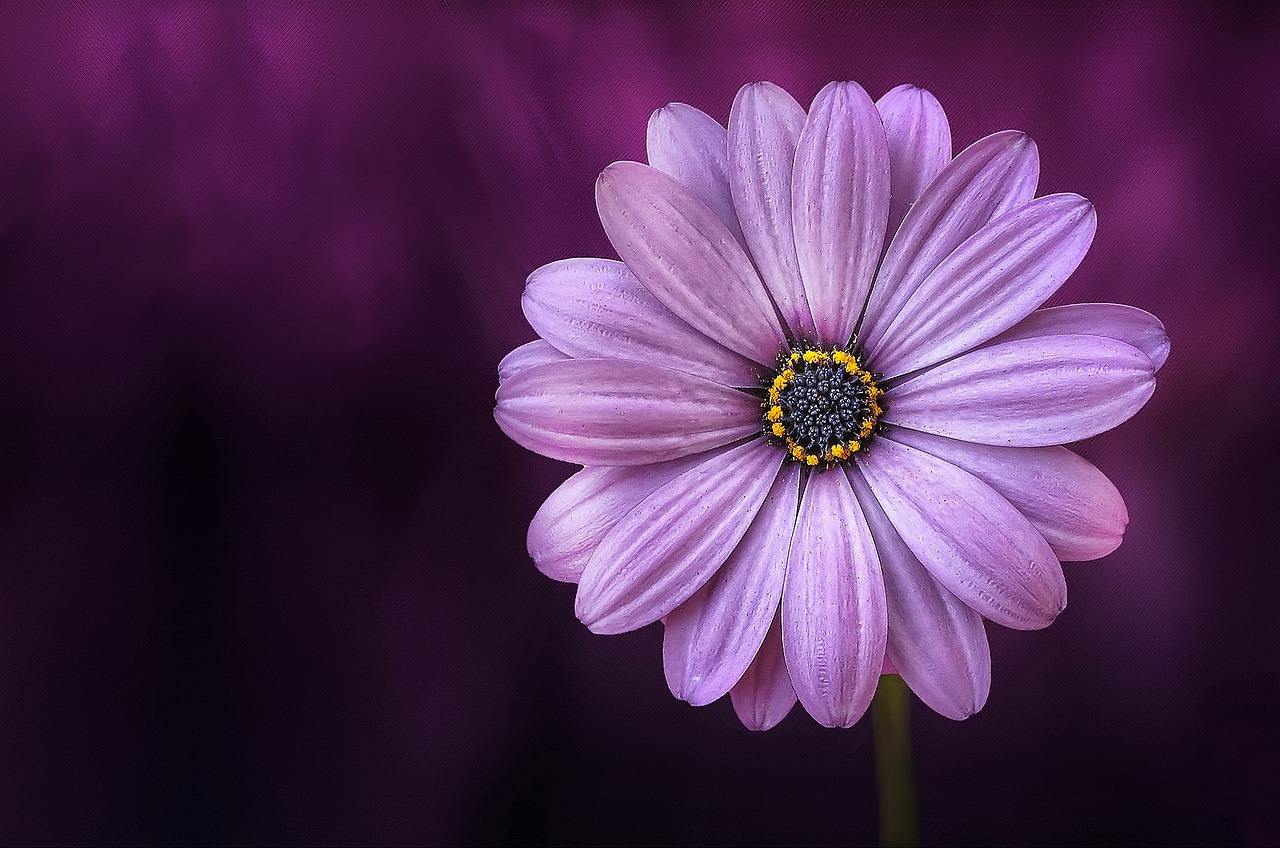

In [31]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow_hub as hub
import keras
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image
image = cv2.imread('/content/flower.jpeg')
cv2_imshow(image)

In [14]:
# Upload an image from your local file system
uploaded = files.upload()
image_name = next(iter(uploaded))
image_data = BytesIO(uploaded[image_name])

Saving flower.jpeg to flower (1).jpeg


In [16]:
# Load the image using PIL
original_image = Image.open(image_data)# Convert the PIL image to an OpenCV image
opencv_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)

In [17]:
# Apply Gaussian Blur to the image
gaussian_blur = cv2.GaussianBlur(opencv_image, (0, 0), 3)

In [18]:
# Sharpen image using the Unsharp Masking technique
sharpened_image = cv2.addWeighted(opencv_image, 1.5, gaussian_blur, -0.5, 0)

In [19]:
# Convert the processed image back to RGB to display it using matplotlib
sharpened_image_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)

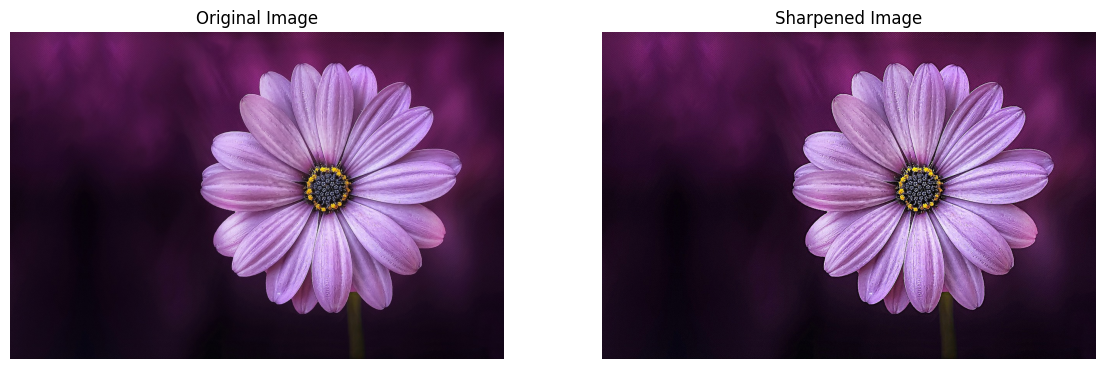

In [20]:
# Display the original and the sharpened images
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image_rgb)
plt.axis('off')

plt.show()

In [25]:
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the uploaded file path

Saving flower.jpeg to flower (2).jpeg


In [32]:
pip install opencv-python-headless scikit-image matplotlib

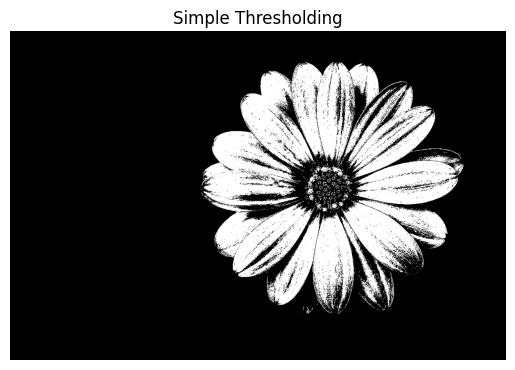

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/flower.jpeg', 0)

# Apply simple thresholding
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh1, cmap='gray')
plt.title('Simple Thresholding')
plt.axis('off')
plt.show()


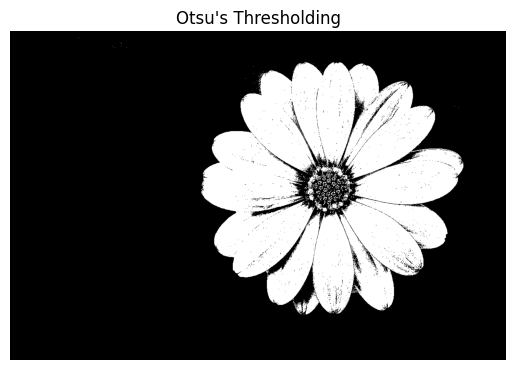

In [36]:
# Apply Otsu's thresholding
ret2, thresh2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh2, cmap='gray')
plt.title('Otsu\'s Thresholding')
plt.axis('off')
plt.show()


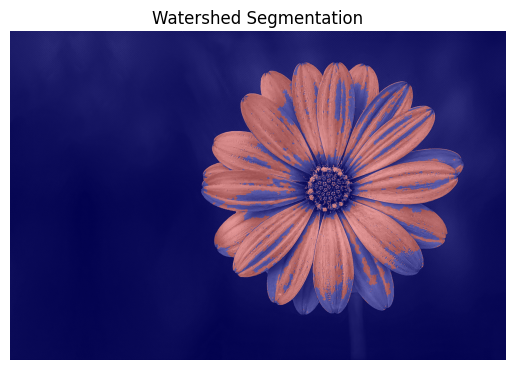

In [38]:
from skimage import io, img_as_float
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage import measure

image = img_as_float(io.imread('/content/flower.jpeg', as_gray=True))

# Compute the gradient of the image
gradient = sobel(image)

# Find markers
markers = np.zeros_like(image)
foreground, background = 1, 2
markers[image < 0.4] = background
markers[image > 0.6] = foreground

# Perform watershed
ws = watershed(gradient, markers)

# Convert to RGB
seg1 = label2rgb(ws, image=image, bg_label=0)

plt.imshow(seg1)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
